## 1. Data Preprocessing

### 1.1 Importing Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
def import_csv(file_path):
    """

    Import a CSV file and return a pandas DataFrame.

    """
    
    df = pd.read_csv(file_path)
    return df

In [3]:
def import_csv_and_split_by_year(file_path):
    """

    Import a CSV file, split it by year and return a dictionary of DataFrames.
    
    """

    df = pd.read_csv(file_path, dtype=str)
    df['Reporting Date'] = pd.to_datetime(df['Reporting Date'], format='%d-%b-%y')
    df['year'] = df['Reporting Date'].dt.year

    years = df['year'].unique()
    print(f'There are {len(years)} unique years: {years}')

    for year in years:
        globals()[f'df_{year}'] = df[df['year'] == year]
        print(f'Year {year} has {len(globals()[f"df_{year}"])} rows')

import_csv_and_split_by_year("Job_History.csv")

There are 7 unique years: [2022 2021 2023 2024 2020 2019 2018]
Year 2022 has 125110 rows
Year 2021 has 107232 rows
Year 2023 has 143129 rows
Year 2024 has 51388 rows
Year 2020 has 89780 rows
Year 2019 has 71174 rows
Year 2018 has 13695 rows


In [4]:
print(df_2024.tail(10))

       Reporting Date Person ID Employee Status Employee Class  \
601498     2024-04-01    128214          Active      Workforce   
601499     2024-04-01    128227          Active      Workforce   
601500     2024-04-01    128228          Active      Workforce   
601501     2024-04-01    128242          Active      Workforce   
601502     2024-04-01    128243          Active      Workforce   
601503     2024-04-01    128247          Active      Workforce   
601504     2024-04-01    128255          Active      Workforce   
601505     2024-04-01    128256          Active      Workforce   
601506     2024-04-01    128263          Active      Workforce   
601507     2024-04-01    128297          Active      Workforce   

           Employment Type Company (externalCode)   Company (Label)  \
601498  Full-Time Employee                    400  John Holland P/L   
601499  Full-Time Employee                    400  John Holland P/L   
601500  Full-Time Employee                    400  John Holl

In [5]:
print(df_2024.info())

<class 'pandas.core.frame.DataFrame'>
Index: 51388 entries, 8341 to 601507
Data columns (total 40 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Reporting Date                         51388 non-null  datetime64[ns]
 1   Person ID                              51388 non-null  object        
 2   Employee Status                        51388 non-null  object        
 3   Employee Class                         51388 non-null  object        
 4   Employment Type                        51388 non-null  object        
 5   Company (externalCode)                 51388 non-null  object        
 6   Company (Label)                        51388 non-null  object        
 7   Division (Code)                        51388 non-null  object        
 8   Division                               51388 non-null  object        
 9   Subdivision (Code)                     51388 non-null  object 

In [6]:
# Get the count of each unique value in the 'BU' column
value_counts = df_2024['BU'].value_counts()

# Print the count of each unique value
print(value_counts)

BU
Infrastructure              16596
Major Projects              14604
Rail                        11341
Building                     5191
ICT                          1058
TEK                           647
People                        585
Commercial                    502
Finance & Group Services      376
Strategy                      166
WA Region                     112
HSE                            90
D&I                            80
Customer & Corp Affairs        20
Chief Operations Office        12
Executive Management            8
Name: count, dtype: int64


In [7]:
# Copy the original DataFrame
df_2024_combined = df_2024.copy()

# Define the values to be replaced
values_to_replace = ['Customer & Corp Affairs', 'Chief Operations Office', 'Commercial', 'Executive Management', 'Finance & Group Services', 'HSE', 'ICT', 'People', 'Strategy', 'WA Region']

# Replace the values in the 'BU' column of the copied DataFrame
df_2024_combined['BU'] = df_2024_combined['BU'].replace(values_to_replace, 'Corporate')

# Get the count of each unique value in the 'BU' column of the copied DataFrame
value_counts = df_2024_combined['BU'].value_counts()

# Print the count of each unique value
print(value_counts)

BU
Infrastructure    16596
Major Projects    14604
Rail              11341
Building           5191
Corporate          2929
TEK                 647
D&I                  80
Name: count, dtype: int64


In [8]:
print(df_2024_combined['Person ID'].value_counts())

Person ID
29152     4
113849    4
116487    4
117618    4
118372    4
         ..
127701    1
111588    1
111288    1
61397     1
128108    1
Name: count, Length: 12945, dtype: int64


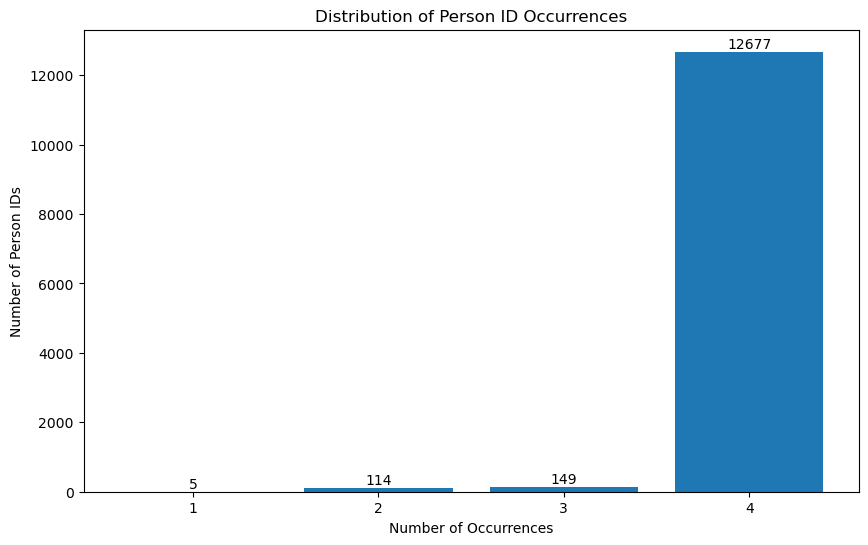

In [9]:
# Calculate the counts
counts = df_2024_combined['Person ID'].value_counts()

# Plot the histogram
plt.figure(figsize=(10,6))
hist = plt.hist(counts, bins=range(1, counts.max()+2), align='left', rwidth=0.8)

# Add text
for i in range(len(hist[0])):
    plt.text(hist[1][i],hist[0][i],str(int(hist[0][i])), ha='center', va='bottom')

plt.xticks(range(1, counts.max()+1)) 
plt.xlabel('Number of Occurrences')
plt.ylabel('Number of Person IDs')
plt.title('Distribution of Person ID Occurrences')
plt.show()

In [10]:
# Ensure 'Reporting Date' is datetime type
df_2024_combined['Reporting Date'] = pd.to_datetime(df_2024_combined['Reporting Date'])

# Filter rows
active_2024 = df_2024_combined[(df_2024_combined['Reporting Date'] == '2024-04-01') & (df_2024_combined['Employee Status'] == 'Active')]

In [11]:
print(active_2024.head())
print(active_2024.shape[0])

       Reporting Date Person ID Employee Status Employee Class  \
588574     2024-04-01     10390          Active          Staff   
588575     2024-04-01     10833          Active          Staff   
588577     2024-04-01     11586          Active          Staff   
588578     2024-04-01     11587          Active          Staff   
588580     2024-04-01     12182          Active          Staff   

           Employment Type Company (externalCode)     Company (Label)  \
588574  Full-Time Employee                    100  John Holland Group   
588575  Full-Time Employee                    100  John Holland Group   
588577  Full-Time Employee                    100  John Holland Group   
588578  Full-Time Employee                    100  John Holland Group   
588580  Full-Time Employee                    100  John Holland Group   

       Division (Code)          Division Subdivision (Code)  ... Placements  \
588574             RAL  Rail & Transport              RALPR  ...        NaN   
588575

In [12]:
manager_data = import_csv("Job_History_Manager_Change.csv")
print(manager_data.head(10))

   Event Date Event Month  Person ID Gender Employee Status (Picklist Label)  \
0  18/10/2018  31/10/2018       7417      M                           Active   
1  17/03/2020  31/03/2020       7417      M                           Active   
2  28/03/2020  31/03/2020       7417      M                           Active   
3  15/06/2020  30/06/2020       7417      M                           Active   
4  23/07/2020  31/07/2020       7417      M                           Active   
5  30/07/2020  31/07/2020       7417      M                           Active   
6  10/08/2020  31/08/2020       7417      M                           Active   
7  31/08/2020  31/08/2020       7417      M                           Active   
8  28/10/2021  31/10/2021       7417      M                           Active   
9  18/10/2018  31/10/2018       8129      M                           Active   

  Employee Class (Picklist Label) Employment Type (Picklist Label)  \
0                           Staff               F

In [13]:
print(manager_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55285 entries, 0 to 55284
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Event Date                        55285 non-null  object 
 1   Event Month                       55285 non-null  object 
 2   Person ID                         55285 non-null  int64  
 3   Gender                            53559 non-null  object 
 4   Employee Status (Picklist Label)  55285 non-null  object 
 5   Employee Class (Picklist Label)   55285 non-null  object 
 6   Employment Type (Picklist Label)  55285 non-null  object 
 7   Division                          55285 non-null  object 
 8   Subdivision (Label)               55285 non-null  object 
 9   Department Name                   55285 non-null  object 
 10  JH Job Family (Label)             55285 non-null  object 
 11  JH Position Title (Label)         55285 non-null  object 
 12  Exte

In [14]:
# Filter rows where 'Supervisor ID' is null
null_supervisor_id = manager_data[manager_data['Supervisor ID'].isnull()]

# Print these rows
print(null_supervisor_id)

       Event Date Event Month  Person ID Gender  \
2287   13/07/2023  31/07/2023      27835      M   
29998   1/04/2021  30/04/2021     111430      F   
31585  28/10/2022  31/10/2022     112227      F   

      Employee Status (Picklist Label) Employee Class (Picklist Label)  \
2287                            Active                           Staff   
29998                           Active                           Staff   
31585                       Terminated                           Staff   

      Employment Type (Picklist Label)                     Division  \
2287                Full-Time Employee               Building Group   
29998               Part-Time Employee               Infrastructure   
31585               Full-Time Employee  Infrastructure VIC/SA & TAS   

                      Subdivision (Label)                 Department Name  \
2287                   Building Overheads        Building Project Support   
29998  Infrastructure Projects VIC/SA/TAS  North Western Pr

In [15]:
# Ensure 'event date' is datetime type
manager_data['Event Date'] = pd.to_datetime(manager_data['Event Date'], format='%d/%m/%Y')

# Get the index of the latest date for each 'person id'
idx = manager_data.groupby('Person ID')['Event Date'].idxmax()

# Select the rows with these indices
latest_manager_data = manager_data.loc[idx]
print(latest_manager_data.head(10))

   Event Date Event Month  Person ID Gender Employee Status (Picklist Label)  \
8  2021-10-28  31/10/2021       7417      M                           Active   
17 2021-05-31  31/05/2021       8129      M                           Active   
21 2020-08-22  31/08/2020      10009      M                           Active   
29 2022-04-01  30/04/2022      10058      M                           Active   
38 2023-11-01  30/11/2023      10066      M                           Active   
50 2023-07-10  31/07/2023      10074      M                           Active   
52 2019-07-05  31/07/2019      10076      M                           Active   
65 2023-10-19  31/10/2023      10079      M                           Active   
74 2024-01-11  31/01/2024      10087      M                           Active   
78 2020-07-13  31/07/2020      10103      M                           Active   

   Employee Class (Picklist Label) Employment Type (Picklist Label)  \
8                            Staff              

In [16]:
# Convert 'Person ID' columns to string
active_2024.loc[:, 'Person ID'] = active_2024['Person ID'].astype(str)
latest_manager_data.loc[:, 'Person ID'] = latest_manager_data['Person ID'].astype(str)

# Merge active_2024 and latest_manager_data on 'Person ID'
merged_2024 = active_2024.merge(latest_manager_data[['Person ID', 'Supervisor ID']], on='Person ID', how='left')

In [17]:
print(merged_2024.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5955 entries, 0 to 5954
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Reporting Date                         5955 non-null   datetime64[ns]
 1   Person ID                              5955 non-null   object        
 2   Employee Status                        5955 non-null   object        
 3   Employee Class                         5955 non-null   object        
 4   Employment Type                        5955 non-null   object        
 5   Company (externalCode)                 5955 non-null   object        
 6   Company (Label)                        5955 non-null   object        
 7   Division (Code)                        5955 non-null   object        
 8   Division                               5955 non-null   object        
 9   Subdivision (Code)                     5955 non-null   object  

In [18]:
print(merged_2024.head(10))

  Reporting Date Person ID Employee Status Employee Class     Employment Type  \
0     2024-04-01     10390          Active          Staff  Full-Time Employee   
1     2024-04-01     10833          Active          Staff  Full-Time Employee   
2     2024-04-01     11586          Active          Staff  Full-Time Employee   
3     2024-04-01     11587          Active          Staff  Full-Time Employee   
4     2024-04-01     12182          Active          Staff  Full-Time Employee   
5     2024-04-01     12189          Active          Staff  Full-Time Employee   
6     2024-04-01     12276          Active          Staff  Full-Time Employee   
7     2024-04-01     12355          Active          Staff  Full-Time Employee   
8     2024-04-01     14334          Active          Staff  Full-Time Employee   
9     2024-04-01     14775          Active          Staff  Full-Time Employee   

  Company (externalCode)     Company (Label) Division (Code)  \
0                    100  John Holland Group

In [19]:
# Verify rows where 'Person ID' is '10390'
person_id_10390 = latest_manager_data[latest_manager_data['Person ID'] == '10390']
print(person_id_10390)

    Event Date Event Month Person ID Gender Employee Status (Picklist Label)  \
135 2021-08-09  31/08/2021     10390      M                           Active   

    Employee Class (Picklist Label) Employment Type (Picklist Label)  \
135                           Staff               Full-Time Employee   

           Division                 Subdivision (Label)  \
135  Infrastructure  Infrastructure Projects VIC/SA/TAS   

                               Department Name JH Job Family (Label)  \
135  Metro Tunnel Rail Infrastructure Alliance    Technical & Design   

    JH Position Title (Label)  External Title Supervisor ID  \
135            Senior Planner  Senior Planner         60209   

     Diversity Question  
135                 1.0  


In [20]:
# Select the rows where 'supervisorid' is null
null_supervisorid_rows = merged_2024[merged_2024['Supervisor ID'].isnull()]

# Print the selected rows
print(null_supervisorid_rows)

     Reporting Date Person ID Employee Status Employee Class  \
287      2024-04-01    119018          Active          Staff   
547      2024-04-01    118469          Active          Staff   
548      2024-04-01    118531          Active          Staff   
563      2024-04-01    119947          Active          Staff   
964      2024-04-01     64381          Active          Staff   
1131     2024-04-01    119003          Active          Staff   
2231     2024-04-01     86737          Active          Staff   
2601     2024-04-01    113716          Active          Staff   
2838     2024-04-01    117730          Active          Staff   
2947     2024-04-01    119035          Active          Staff   
2959     2024-04-01    119142          Active          Staff   
3603     2024-04-01    123667          Active          Staff   
3633     2024-04-01    123830          Active          Staff   
3693     2024-04-01    124206          Active          Staff   
3874     2024-04-01    125221          A

In [21]:
# Get the counts of each 'Supervisor ID'
supervisorid_counts = merged_2024['Supervisor ID'].value_counts()

# Select the 'Supervisor ID' that appear more than once
duplicated_supervisorid_counts = supervisorid_counts[supervisorid_counts > 1]

# Print the duplicated 'Supervisor ID' and their counts
print(duplicated_supervisorid_counts)

Supervisor ID
88947     215
115230    173
23898     128
25599      72
111284     63
         ... 
119715      2
120443      2
57365       2
114063      2
61140       2
Name: count, Length: 857, dtype: int64


In [22]:
# Get the number of unique 'Supervisor ID'
num_unique_supervisorid = merged_2024['Supervisor ID'].nunique()

print(f'There are {num_unique_supervisorid} unique Supervisor ID.')

There are 1226 unique Supervisor ID.


In [28]:
# Concatenate the 'Person ID' columns of df_2018 to df_2024
all_person_ids = pd.concat([df_2018['Person ID'], df_2019['Person ID'], df_2020['Person ID'], df_2021['Person ID'], df_2022['Person ID'], df_2023['Person ID'], df_2024['Person ID']])

# Check if the supervisor id is in the concatenated 'Person ID' columns
is_in = merged_2024['Supervisor ID'].isin(all_person_ids)

# Print the supervisor id if it is in the concatenated 'Person ID' columns
if is_in.any():
    print("The following supervisor IDs are in the Person IDs from df_2018 to df_2024:")
    print(merged_2024['Supervisor ID'][is_in])
else:
    print("There are no supervisor IDs in the Person IDs from df_2018 to df_2024.")

The following supervisor IDs are in the Person IDs from df_2018 to df_2024:
0        60209
1       119787
2        90261
3        90261
4        90261
         ...  
5949     93081
5950    127219
5952     88232
5953     90361
5954    125004
Name: Supervisor ID, Length: 5322, dtype: object


In [26]:
# Merge the dataframe with itself on 'Supervisor ID' and 'Person ID'
merged_df = merged_2024.merge(merged_2024, left_on='Supervisor ID', right_on='Person ID', suffixes=('', '_Supervisor'))

# Add a condition to check if 'BU' of the person is different from 'BU' of the supervisor
diff_bu = merged_df[merged_df['BU'] != merged_df['BU_Supervisor']]

# Print the 'Person ID' of the employees whose 'BU' is different from their supervisor's 'BU'
if not diff_bu.empty:
    print("The following employees are not in the same BU as their supervisor:")
    print(diff_bu['Person ID'])
else:
    print("There are no employees who are in a different BU from their supervisor.")

The following employees are not in the same BU as their supervisor:
123     125290
127      61295
130     118512
131     118899
133     123194
         ...  
5031    126968
5032    127094
5139    123959
5140    119980
5142    124378
Name: Person ID, Length: 228, dtype: object


In [29]:
import numpy as np

# Set the 'Supervisor ID' that are not in 'Person ID' to NaN
merged_2024.loc[~merged_2024['Supervisor ID'].isin(merged_2024['Person ID']), 'Supervisor ID'] = np.nan

In [30]:
# Select the rows where 'supervisorid' is null
null_supervisorid_rows = merged_2024[merged_2024['Supervisor ID'].isnull()]

# Print the selected rows
print(null_supervisorid_rows)

     Reporting Date Person ID Employee Status Employee Class  \
28       2024-04-01     32110          Active          Staff   
44       2024-04-01     48970          Active          Staff   
71       2024-04-01     58935          Active          Staff   
83       2024-04-01     59666          Active          Staff   
131      2024-04-01     87091          Active          Staff   
...             ...       ...             ...            ...   
5935     2024-04-01    128160          Active      Workforce   
5938     2024-04-01    128173          Active      Workforce   
5945     2024-04-01    128214          Active      Workforce   
5948     2024-04-01    128242          Active      Workforce   
5951     2024-04-01    128255          Active      Workforce   

         Employment Type Company (externalCode)     Company (Label)  \
28    Full-Time Employee                    100  John Holland Group   
44    Full-Time Employee                    100  John Holland Group   
71    Full-Time Em

In [31]:
# Define a function to filter the groups
def filter_different_BU(group):
    return group['BU'].nunique() > 1

# Group by 'Department' and filter the groups
filtered_groups = merged_2024.groupby('Department').filter(filter_different_BU)

# Select the 'Department', 'person id' and 'BU' columns
filtered_data = filtered_groups[['Department', 'Department (Code)', 'Person ID', 'BU']]

# Print the filtered data
print(filtered_data)

# Get the number of unique departments
num_unique_departments = filtered_data['Department'].nunique()
# Print the number of unique departments
print(f"\nNumber of unique departments: {num_unique_departments}")
# Get the number of unique department codes
num_unique_department_codes = filtered_data['Department (Code)'].nunique()
# Print the number of unique department codes
print(f"\nNumber of unique department codes: {num_unique_department_codes}")
# Select the rows where 'Department' is 'Gold Coast Light Rail Stage 3'
selected_rows = filtered_data[filtered_data['Department'] == 'Gold Coast Light Rail Stage 3']
# Get the number of unique BU in the selected rows
num_unique_BU = selected_rows['BU'].nunique()
# Print the number of unique BU
print(f"Number of unique BU in 'Gold Coast Light Rail Stage 3': {num_unique_BU}")

                         Department Department (Code) Person ID  \
285   Gold Coast Light Rail Stage 3           GCLR3-I    118730   
416   Gold Coast Light Rail Stage 3           GCLR3-I     53224   
422   Gold Coast Light Rail Stage 3           GCLR3-I     61430   
437   Gold Coast Light Rail Stage 3           GCLR3-R    110476   
448   Gold Coast Light Rail Stage 3           GCLR3-I    120649   
...                             ...               ...       ...   
4721  Gold Coast Light Rail Stage 3           GCLR3-I    128114   
4722  Gold Coast Light Rail Stage 3           GCLR3-I    128134   
4723  Gold Coast Light Rail Stage 3           GCLR3-I    128136   
4724  Gold Coast Light Rail Stage 3           GCLR3-I    128149   
4727  Gold Coast Light Rail Stage 3           GCLR3-I    128206   

                  BU  
285   Infrastructure  
416   Infrastructure  
422   Infrastructure  
437             Rail  
448   Infrastructure  
...              ...  
4721  Infrastructure  
4722  Infra

In [32]:
# Get the number of unique Department Code in merged_2024
num_department_code = merged_2024['Department (Code)'].nunique()

print(f'There are {num_department_code} unique Department Code in merged_2024.')

There are 199 unique Department Code in merged_2024.


## 2. Exploratory Data Analysis

## 3. Social Network Analysis

In [33]:
import networkx as nx
import matplotlib.pyplot as plt

In [34]:
# Create an empty graph
G = nx.Graph()

# Create an empty graph 
G.clear()
# Iterate over the rows of the DataFrame
for index, row in merged_2024.iterrows():
    # Add the row as a node to the graph
    G.add_node(index, attr_dict=row.to_dict())

# Print the number of nodes in the graph
print(f"Number of nodes: {G.number_of_nodes()}")

Number of nodes: 5955


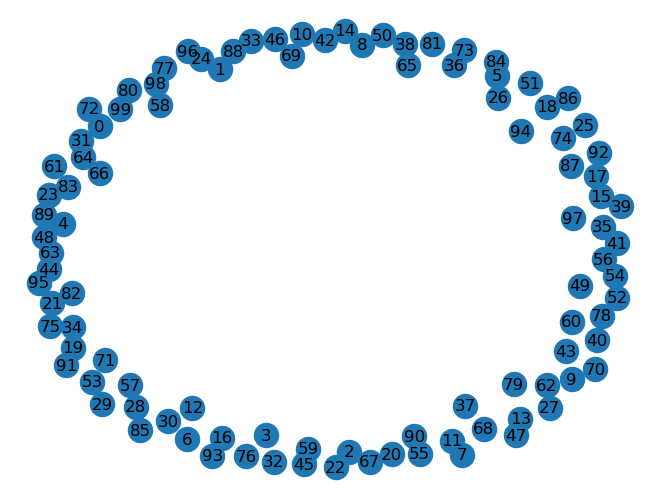

{'attr_dict': {'Reporting Date': Timestamp('2024-04-01 00:00:00'), 'Person ID': '28893', 'Employee Status': 'Active', 'Employee Class': 'Staff', 'Employment Type': 'Full-Time Employee', 'Company (externalCode)': '100', 'Company (Label)': 'John Holland Group', 'Division (Code)': 'INFR', 'Division': 'Infrastructure', 'Subdivision (Code)': 'INFRPRV', 'Subdivision (Label)': 'Infrastructure Projects VIC/SA/TAS', 'Department (Code)': '7111', 'Department': 'North Western Program Alliance', 'JH Job Family (externalCode)': 'TAL-CONSTR', 'JH Job Family': 'Trades and Labour - Construction Trades', 'JH Position Title (externalCode)': 'TAL-CONSTR-SUPINT', 'JH Position Title': 'Superintendent', 'External Title': 'Superintendent', 'Original Start Date': '10/01/2022', 'Hire Date': '10/01/2022', 'Last Day of Service': nan, 'Sub Termination Reason (externalCode)': nan, 'Sub Termination Reason (Label)': nan, 'Location Group (Name)': 'Victoria', 'RCM City': 'Melbourne', 'RCM State (externalName)': 'Victor

In [35]:
# Create a subgraph with the first 100 nodes
H = G.subgraph(list(G.nodes)[:100])

# Draw the subgraph
nx.draw(H, with_labels=True)

# Show the plot
plt.show()

# Get the information of node 20
node_20_info = H.nodes[20]

# Print the information of node 20
print(node_20_info)

In [36]:
H.nodes[20].get('attr_dict').get('Person ID')

'28893'

In [37]:
# Get the count of each unique value in the 'BU' column
value_counts = merged_2024['BU'].value_counts()

# Print the count of each unique value
print(value_counts)

BU
Infrastructure    1685
Major Projects    1650
Rail              1380
Building           720
Corporate          426
TEK                 94
Name: count, dtype: int64


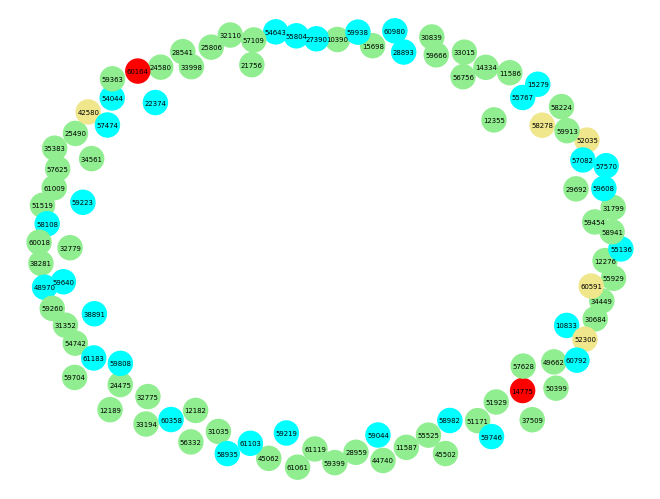

In [38]:
# Define a color map
color_map = {
    'Major Projects': 'red',
    'Infrastructure': 'cyan',
    'Rail': 'lightgreen',
    'Building': 'khaki',
    'Corporate': 'sandybrown',
    'TEK': 'lightsteelblue',
    'D&I': 'lightpink'
}

# Get the colors of the nodes
node_colors = [color_map.get(H.nodes[node].get('attr_dict').get('BU', 'D&I'), 'pink') for node in H.nodes]

# Get the labels of the nodes
node_labels = {node: H.nodes[node].get('attr_dict').get('Person ID', 'N/A') for node in H.nodes}

# Draw the subgraph
nx.draw(H, with_labels=True, node_color=node_colors, labels=node_labels, font_size = 5)

# Show the plot
plt.show()

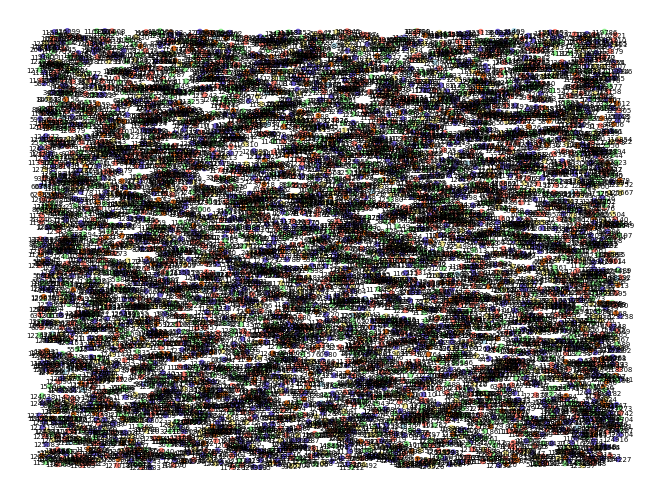

In [39]:
# Define a color map
color_map = {
    'Major Projects': 'salmon',
    'Infrastructure': 'slateblue',
    'Rail': 'lightgreen',
    'Building': 'khaki',
    'Corporate': 'chocolate',
    'TEK': 'lightblue',
    'D&I': 'lightpink'
}

# Get the colors of the nodes
node_colors = [color_map.get(G.nodes[node].get('attr_dict').get('BU', 'D&I'), 'pink') for node in G.nodes]

# Get the labels of the nodes
node_labels = {node: G.nodes[node].get('attr_dict').get('Person ID', 'N/A') for node in G.nodes}

# Get the spring layout positions
pos = nx.random_layout(G)

# Draw the subgraph
nx.draw(G, pos, with_labels=True, node_color=node_colors, labels=node_labels, font_size=5, node_size=10)

# Show the plot
plt.show()

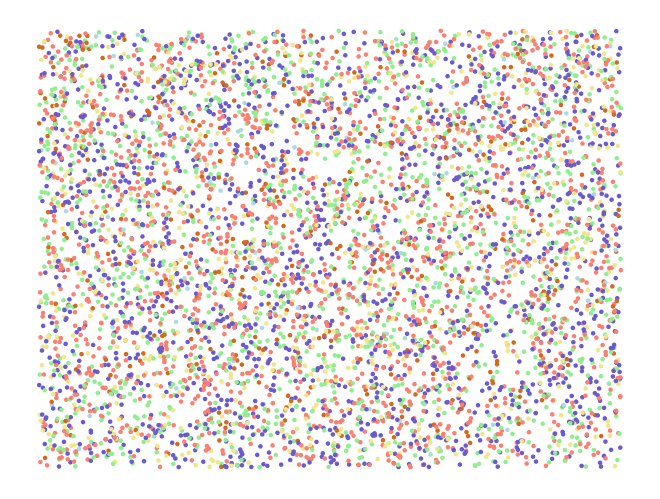

In [40]:
# Define a color map
color_map = {
    'Major Projects': 'salmon',
    'Infrastructure': 'slateblue',
    'Rail': 'lightgreen',
    'Building': 'khaki',
    'Corporate': 'chocolate',
    'TEK': 'lightblue',
    'D&I': 'lightpink'
}

# Get the colors of the nodes
node_colors = [color_map.get(G.nodes[node].get('attr_dict').get('BU', 'D&I'), 'pink') for node in G.nodes]

# Get the spring layout positions
pos = nx.random_layout(G)

# Draw the subgraph
nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=5)

# Show the plot
plt.show()

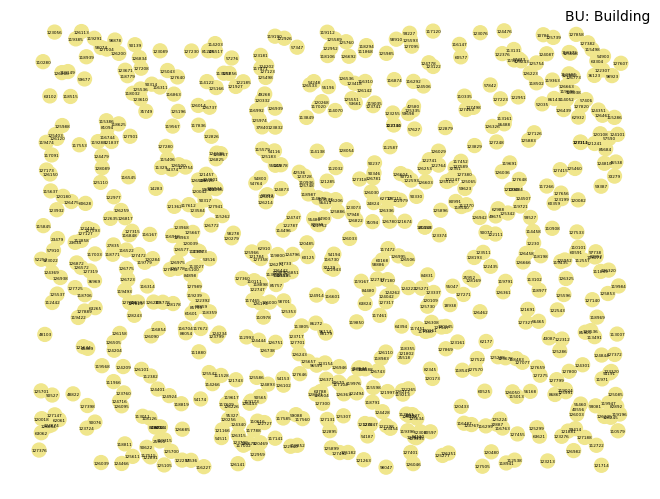

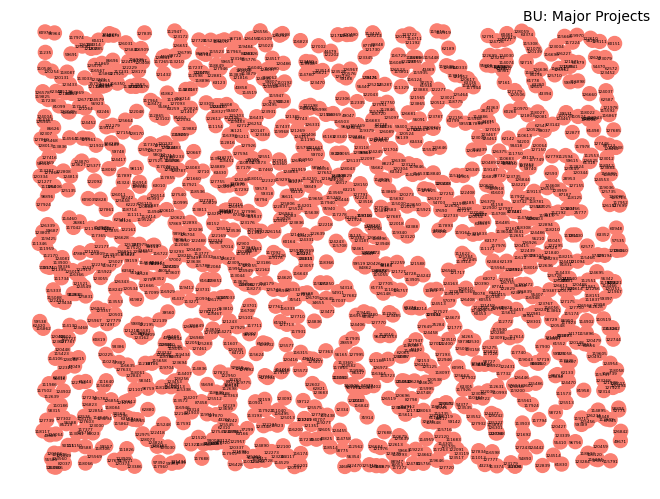

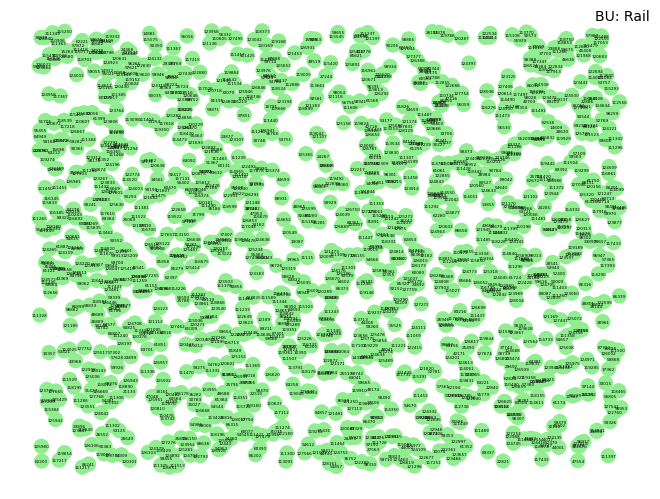

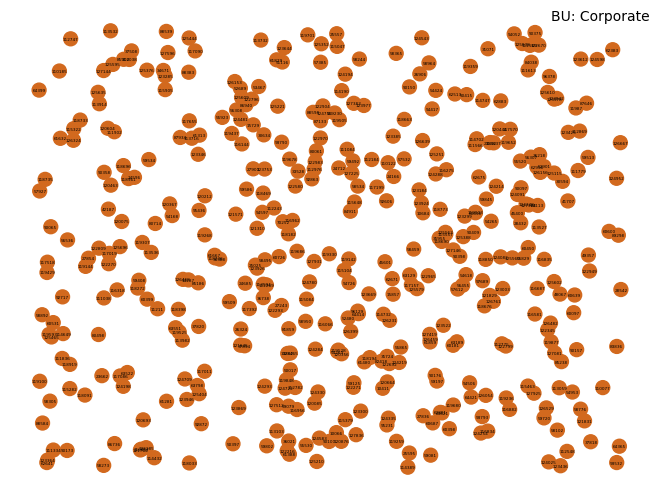

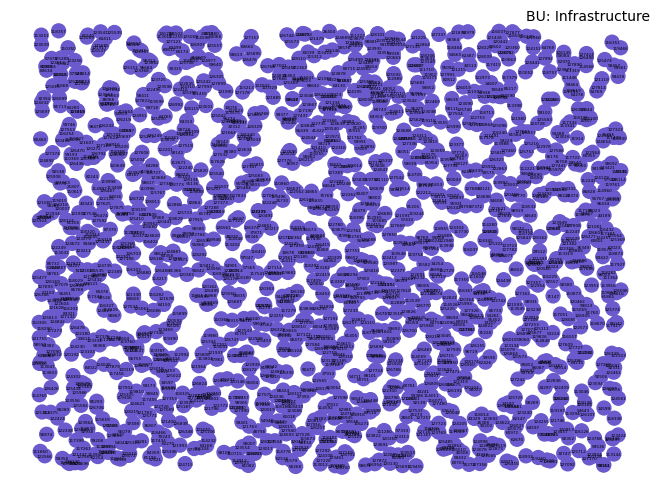

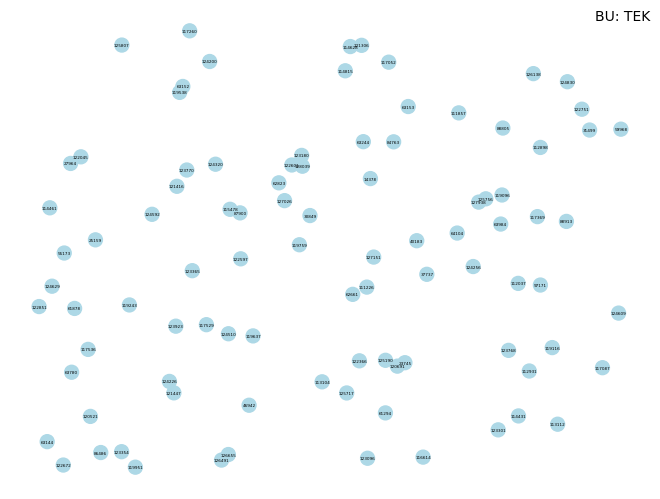

In [41]:
# Get all the unique BUs
all_bu = set(G.nodes[node]['attr_dict'].get('BU', 'D&I') for node in G.nodes)

# For each BU
for bu in all_bu:
    # Create a subgraph with only the nodes of the current BU
    subgraph = G.subgraph([node for node in G.nodes if G.nodes[node]['attr_dict'].get('BU', 'D&I') == bu])

    # Get the colors of the nodes
    node_colors = [color_map.get(subgraph.nodes[node]['attr_dict'].get('BU', 'D&I'), 'pink') for node in subgraph.nodes]

    # Get the labels of the nodes
    node_labels = {node: subgraph.nodes[node]['attr_dict'].get('Person ID', 'N/A') for node in subgraph.nodes}

    # Get the random layout positions for the subgraph
    pos = nx.random_layout(subgraph)

    # Draw the subgraph
    nx.draw(subgraph, pos, with_labels=True, node_color=node_colors, labels=node_labels, font_size=3, node_size=100)

    # Add the BU name at the top right corner
    plt.text(1, 1, f'BU: {bu}', horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)

    # Show the plot
    plt.show()

In [46]:
# Get the nodes where BU is "Major Project"
major_project_nodes = [node for node in G.nodes if G.nodes[node]['attr_dict'].get('BU', 'N/A') == 'Major Projects']

# Get all the unique departments of these nodes
all_departments = set(G.nodes[node]['attr_dict'].get('Department', 'N/A') for node in major_project_nodes)

print(all_departments)

{'Tunnelling', 'Major Projects Energy Project Support', 'Major Projects Overheads Commercial', 'Rozelle Interchange (Westconnex 3B)', 'Major Projects Support', 'M&E', 'Major Projects Finance', 'Kidston Pumped Storage Hydro', 'Energy', 'Major Projects People', 'Major Projects Precontracts', 'Major Projects Management', 'Sydney Metro West - Eastern Tunnelling Package', 'M7-M12 Project', 'Melbourne Metro Rail Project - Tunnels & Stations PPP', 'West Gate Tunnel Project'}


In [47]:
# For each department
for department in all_departments:
    # Get the nodes of the current department
    department_nodes = [node for node in major_project_nodes if G.nodes[node]['attr_dict'].get('Department', 'N/A') == department]

    # Print the number of nodes in the current department
    print(f"Department {department} has {len(department_nodes)} nodes.")


Department Tunnelling has 7 nodes.
Department Major Projects Energy Project Support has 14 nodes.
Department Major Projects Overheads Commercial has 4 nodes.
Department Rozelle Interchange (Westconnex 3B) has 271 nodes.
Department Major Projects Support has 19 nodes.
Department M&E has 4 nodes.
Department Major Projects Finance has 5 nodes.
Department Kidston Pumped Storage Hydro has 35 nodes.
Department Energy has 11 nodes.
Department Major Projects People has 4 nodes.
Department Major Projects Precontracts has 1 nodes.
Department Major Projects Management has 3 nodes.
Department Sydney Metro West - Eastern Tunnelling Package has 216 nodes.
Department M7-M12 Project has 279 nodes.
Department Melbourne Metro Rail Project - Tunnels & Stations PPP has 254 nodes.
Department West Gate Tunnel Project has 523 nodes.


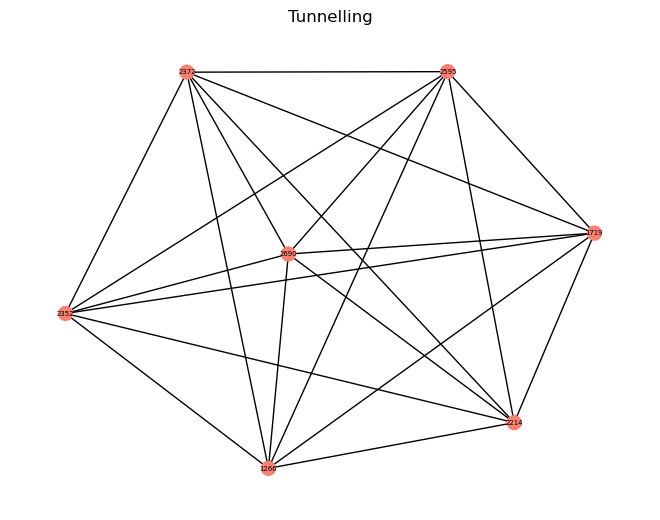

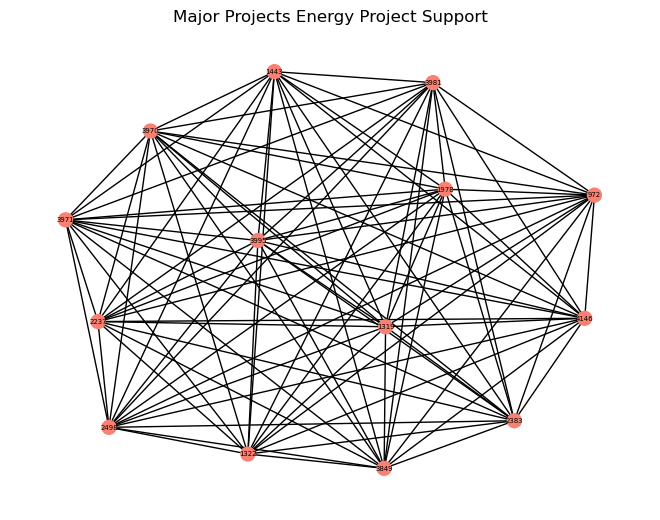

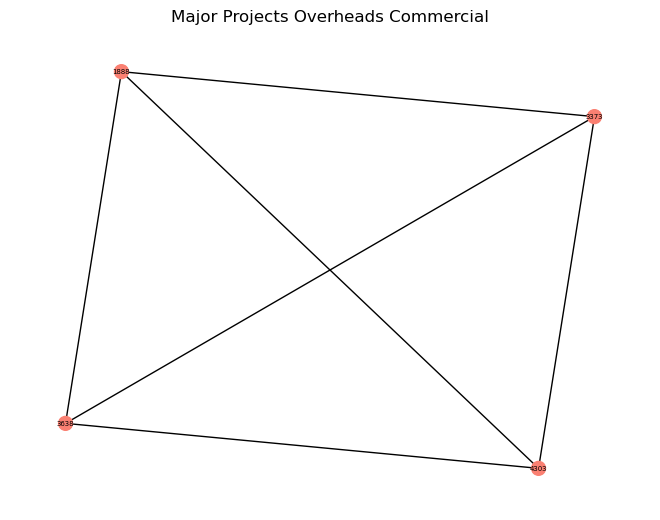

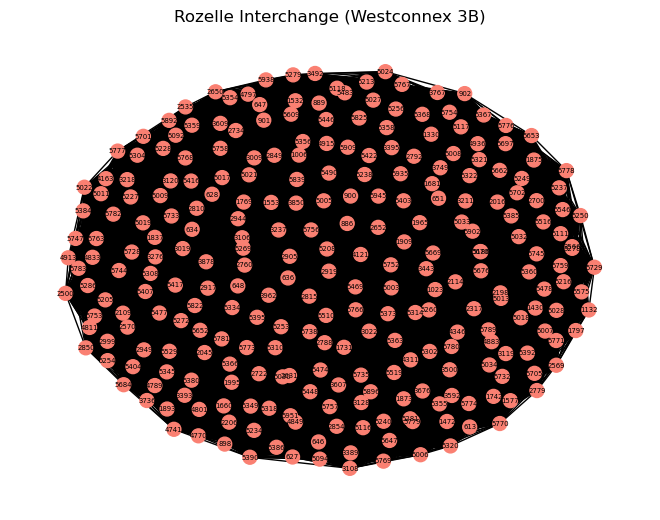

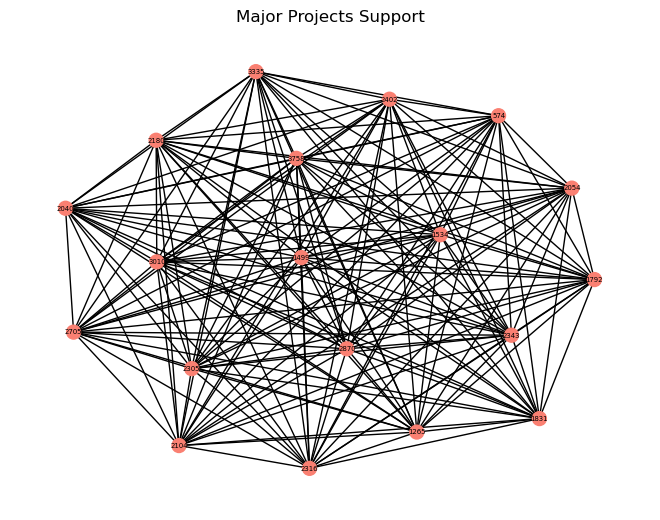

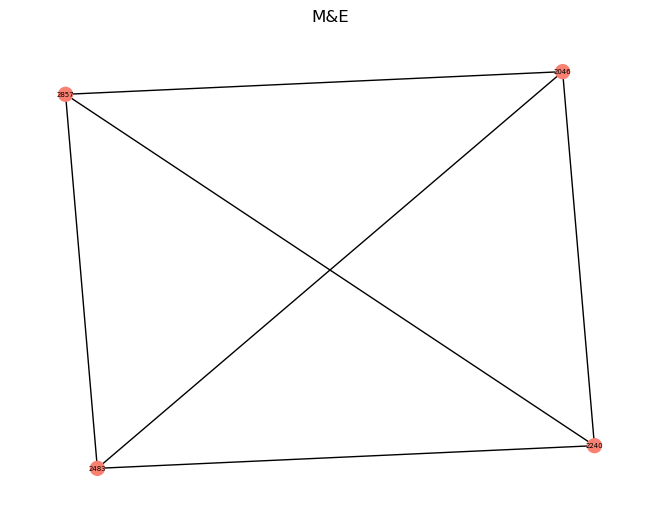

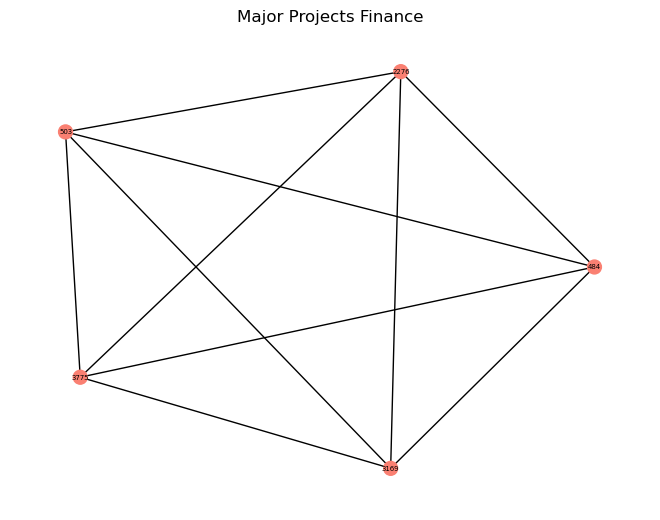

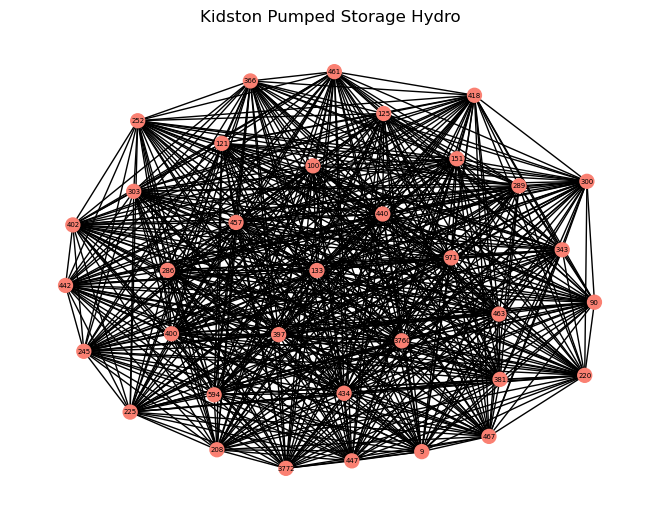

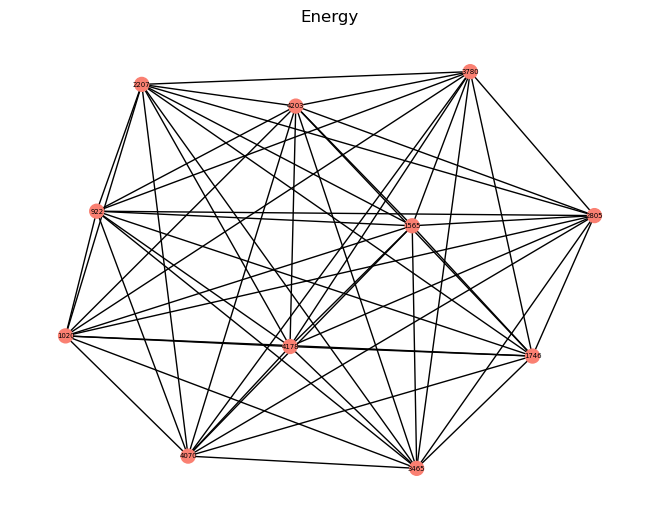

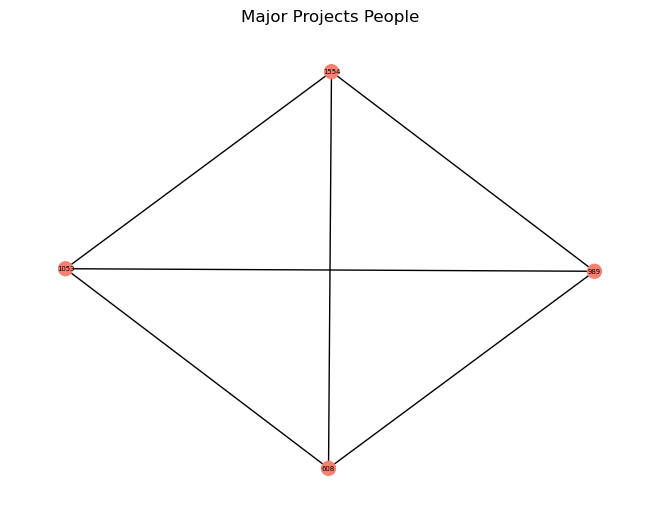

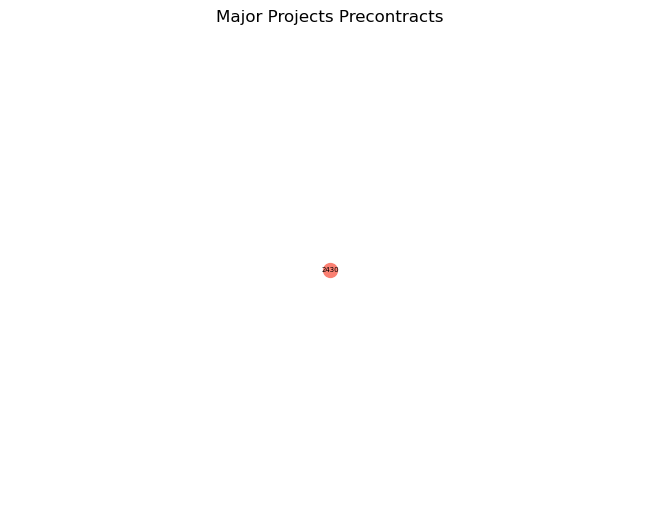

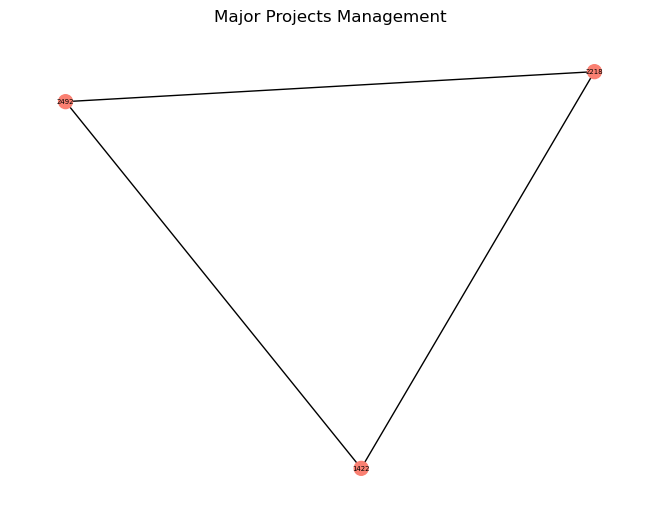

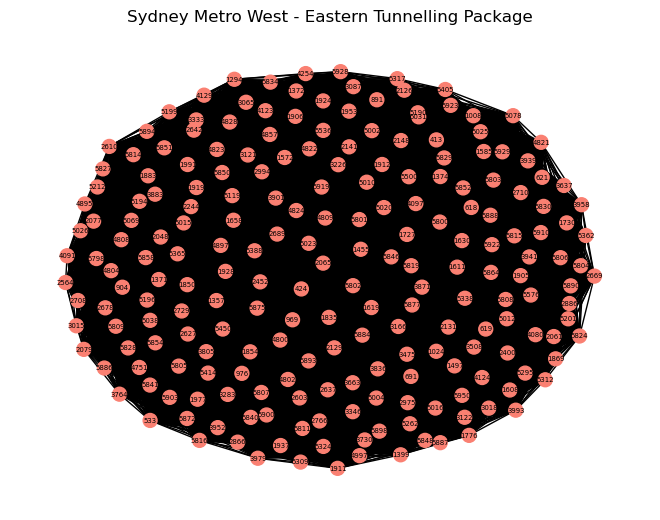

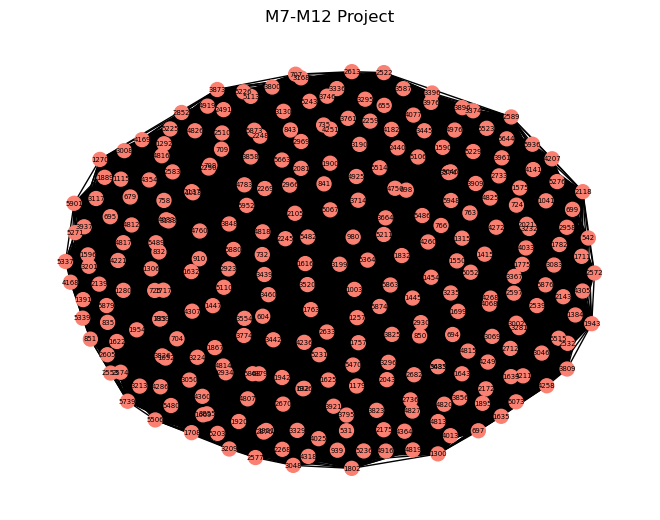

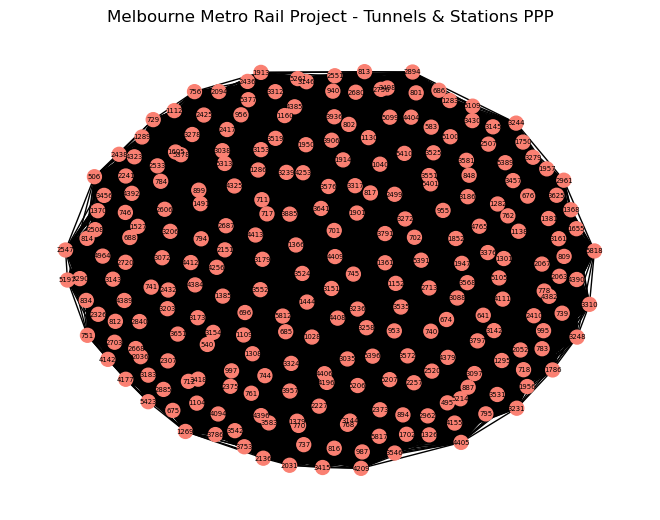

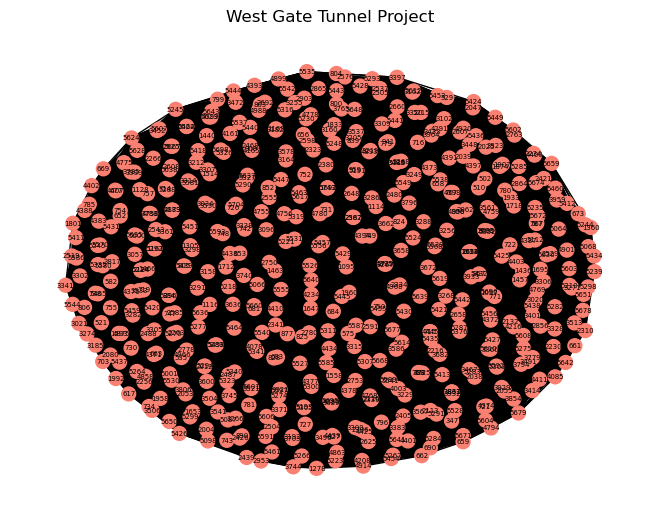

In [48]:
# For each department
for department in all_departments:

    # Get the nodes of the current department
    department_nodes = [node for node in major_project_nodes if G.nodes[node]['attr_dict'].get('Department', 'N/A') == department]

    # For each pair of nodes in the department
    for i in range(len(department_nodes)):
        for j in range(i + 1, len(department_nodes)):
            # Add an edge between the pair of nodes
            G.add_edge(department_nodes[i], department_nodes[j], name=department)

    # Create a subgraph for the current department
    G_department = G.subgraph(department_nodes)

    # Get the colors of the nodes in G_department
    node_colors = [color_map.get(G.nodes[node].get('attr_dict').get('BU', 'D&I'), 'pink') for node in G_department.nodes]

    # Get the spring layout with a larger k value
    pos = nx.spring_layout(G_department, k=0.15)

    # Draw the graph G_department with the colors
    nx.draw(G_department, pos, with_labels=True, node_color=node_colors, node_size = 100, font_size = 5)

    # # Draw the edge labels
    # edge_labels = nx.get_edge_attributes(G_department, 'name')
    # nx.draw_networkx_edge_labels(G_department, pos, edge_labels=edge_labels)

    # Add a title to the graph
    plt.title(department)

    # Show the graph
    plt.show()

In [49]:
G.nodes[20].get('attr_dict').get('Supervisor ID')

'45463'

In [51]:
# Add edges from 'Person ID' to 'Supervisor ID' with 'is_manager' attribute
for node in G.nodes:
    supervisor_id = G.nodes[node].get('attr_dict').get('Supervisor ID')
    
    # Check if 'Supervisor ID' equals to another node's 'Person ID'
    for other_node in G.nodes:
        person_id = G.nodes[other_node].get('attr_dict').get('Person ID')
        
        if supervisor_id == person_id:
            G.add_edge(node, other_node, is_manager=True)



# # Calculate out-degree centrality
# out_degree_centrality = nx.out_degree_centrality(G)

# # Find the node with the maximum out-degree centrality
# max_out_degree_centrality_node = max(out_degree_centrality, key=out_degree_centrality.get)

# # print(f'The node with the maximum out-degree centrality is {max_out_degree_centrality_node} with a centrality of {out_degree_centrality[max_out_degree_centrality_node]}')

In [52]:
# Print the first 5 edges
edges = list(G.edges(data=True))

# Print the 'Person ID' attribute for each node in the first 5 edges
for edge in edges[:5]:
    node1, node2, _ = edge
    person_id1 = G.nodes[node1].get('attr_dict').get('Person ID')
    person_id2 = G.nodes[node2].get('attr_dict').get('Person ID')
    print(f'Edge: {node1} - {node2}, Person ID: {person_id1} - {person_id2}')

Edge: 0 - 7, Person ID: 10390 - 12355
Edge: 0 - 15, Person ID: 10390 - 24580
Edge: 0 - 22, Person ID: 10390 - 29692
Edge: 0 - 23, Person ID: 10390 - 30684
Edge: 0 - 27, Person ID: 10390 - 31799


In [53]:
# Find the node with 'Person ID' = 88947
node_88947 = None
for node in G.nodes:
    if G.nodes[node].get('attr_dict').get('Person ID') == '88947':
        node_88947 = node
        break

# If the node is found, get its edges
if node_88947 is not None:
    edges_88947 = G.edges(node_88947, data=True)

    # Print the edges
    for edge in edges_88947:
        print(edge)
else:
    print("Node with 'Person ID' = 88947 does not exist in the graph.")

(2266, 347, {'name': 'West Gate Tunnel Project'})
(2266, 502, {'name': 'West Gate Tunnel Project'})
(2266, 510, {'name': 'West Gate Tunnel Project'})
(2266, 521, {'name': 'West Gate Tunnel Project'})
(2266, 529, {'name': 'West Gate Tunnel Project'})
(2266, 535, {'name': 'West Gate Tunnel Project'})
(2266, 567, {'name': 'West Gate Tunnel Project'})
(2266, 575, {'name': 'West Gate Tunnel Project'})
(2266, 582, {'name': 'West Gate Tunnel Project'})
(2266, 617, {'name': 'West Gate Tunnel Project'})
(2266, 652, {'name': 'West Gate Tunnel Project'})
(2266, 653, {'name': 'West Gate Tunnel Project'})
(2266, 656, {'name': 'West Gate Tunnel Project'})
(2266, 658, {'name': 'West Gate Tunnel Project'})
(2266, 659, {'name': 'West Gate Tunnel Project'})
(2266, 661, {'name': 'West Gate Tunnel Project'})
(2266, 662, {'name': 'West Gate Tunnel Project'})
(2266, 663, {'name': 'West Gate Tunnel Project', 'is_manager': True})
(2266, 669, {'name': 'West Gate Tunnel Project'})
(2266, 673, {'name': 'West Gat

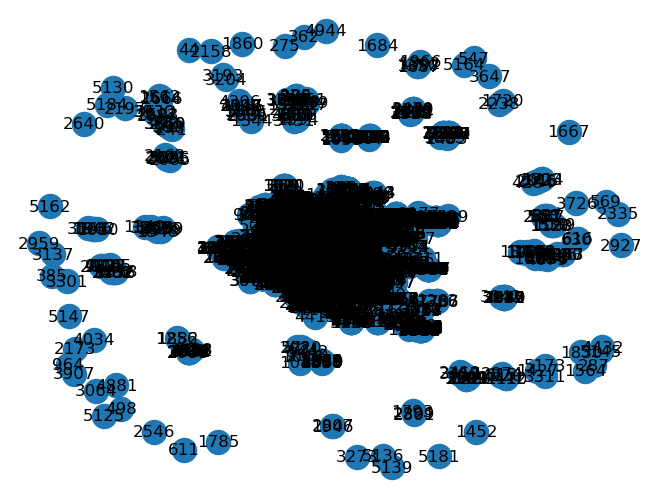

In [54]:
# Draw the new graph
nx.draw(G, with_labels=True)
plt.show()

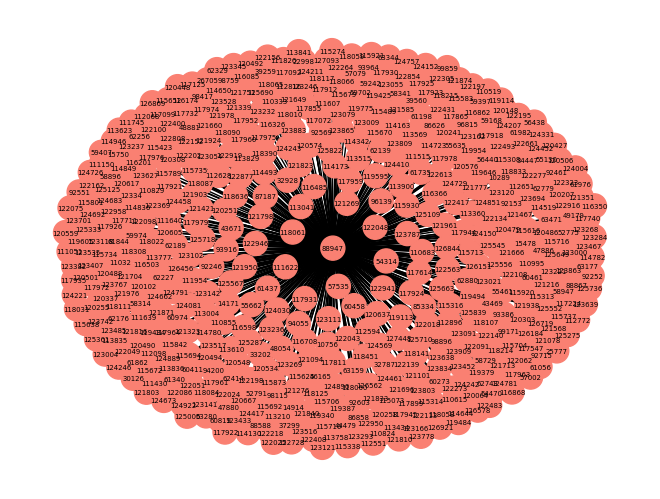

In [55]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

# Create a new graph
G_2266 = nx.Graph()

# Use a queue to implement BFS
queue = deque([2266])

while queue:
    node = queue.popleft()
    G_2266.add_node(node)
    neighbors = list(G.neighbors(node))
    G_2266.add_nodes_from(neighbors)
    
    for neighbor in neighbors:
        if G.has_edge(node, neighbor):
            G_2266.add_edge(node, neighbor)
            
        if neighbor not in G_2266:
            queue.append(neighbor)

# Create a dictionary of labels
labels = {node: G.nodes[node].get('attr_dict').get('Person ID') for node in G_2266.nodes}

# Get the colors of the nodes
node_colors = [color_map.get(G.nodes[node].get('attr_dict').get('BU', 'D&I'), 'pink') for node in G_2266.nodes]

# Draw the new graph
nx.draw(G_2266, labels=labels, node_color=node_colors, with_labels=True, font_size=5)
plt.show()

In [56]:
# Find the node with 'Person ID' = 88947
node_25599 = None
for node in G.nodes:
    if G.nodes[node].get('attr_dict').get('Person ID') == '25599':
        node_25599 = node
        break

# If the node is found, get its edges
if node_25599 is not None:
    edges_25599 = G.edges(node_25599, data=True)

    # Print the edges
    for edge in edges_25599:
        print(edge)
else:
    print("Node with 'Person ID' = 88947 does not exist in the graph.")

(473, 3863, {'is_manager': True})
(473, 1045, {'is_manager': True})
(473, 1056, {'is_manager': True})
(473, 1584, {'is_manager': True})
(473, 1728, {'is_manager': True})
(473, 1805, {'is_manager': True})
(473, 2211, {'is_manager': True})
(473, 2727, {'is_manager': True})
(473, 2728, {'is_manager': True})
(473, 3066, {'is_manager': True})
(473, 3177, {'is_manager': True})
(473, 3223, {'is_manager': True})
(473, 3536, {'is_manager': True})
(473, 3755, {'is_manager': True})
(473, 3840, {'is_manager': True})
(473, 4075, {'is_manager': True})
(473, 4166, {'is_manager': True})
(473, 4459, {'is_manager': True})
(473, 4460, {'is_manager': True})
(473, 4492, {'is_manager': True})
(473, 4521, {'is_manager': True})
(473, 4522, {'is_manager': True})
(473, 4524, {'is_manager': True})
(473, 4526, {'is_manager': True})
(473, 4532, {'is_manager': True})
(473, 4533, {'is_manager': True})
(473, 4534, {'is_manager': True})
(473, 4535, {'is_manager': True})
(473, 4541, {'is_manager': True})
(473, 4552, {'

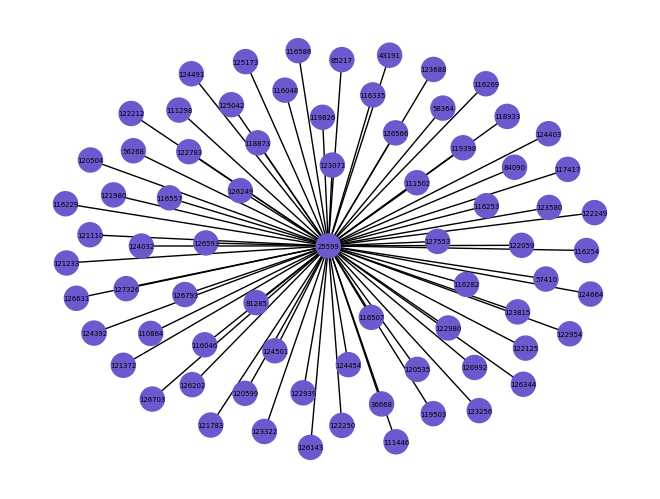

In [57]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

# Create a new graph
G_473 = nx.Graph()

# Use a queue to implement BFS
queue = deque([473])

while queue:
    node = queue.popleft()
    G_473.add_node(node)
    neighbors = list(G.neighbors(node))
    G_473.add_nodes_from(neighbors)
    
    for neighbor in neighbors:
        if G.has_edge(node, neighbor):
            G_473.add_edge(node, neighbor)
            
        if neighbor not in G_473:
            queue.append(neighbor)

# Create a dictionary of labels
labels = {node: G.nodes[node].get('attr_dict').get('Person ID') for node in G_473.nodes}

# Get the colors of the nodes
node_colors = [color_map.get(G.nodes[node].get('attr_dict').get('BU', 'D&I'), 'pink') for node in G_473.nodes]

# Draw the new graph with labels
nx.draw(G_473, labels=labels, node_color=node_colors, with_labels=True, font_size=5)
plt.show()

In [58]:
# Find the node with 'Person ID' = 88947
node_12355 = None
for node in G.nodes:
    if G.nodes[node].get('attr_dict').get('Person ID') == '12355':
        node_12355 = node
        break

# If the node is found, get its edges
if node_12355 is not None:
    edges_12355 = G.edges(node_12355, data=True)

    # Print the edges
    for edge in edges_12355:
        print(edge)
else:
    print("Node with 'Person ID' = 12355 does not exist in the graph.")

(7, 0, {'name': 'Metro Tunnel Rail Network Alliance'})
(7, 15, {'name': 'Metro Tunnel Rail Network Alliance'})
(7, 22, {'name': 'Metro Tunnel Rail Network Alliance'})
(7, 23, {'name': 'Metro Tunnel Rail Network Alliance'})
(7, 27, {'name': 'Metro Tunnel Rail Network Alliance'})
(7, 31, {'name': 'Metro Tunnel Rail Network Alliance'})
(7, 35, {'name': 'Metro Tunnel Rail Network Alliance'})
(7, 43, {'name': 'Metro Tunnel Rail Network Alliance'})
(7, 48, {'name': 'Metro Tunnel Rail Network Alliance'})
(7, 54, {'name': 'Metro Tunnel Rail Network Alliance'})
(7, 60, {'name': 'Metro Tunnel Rail Network Alliance'})
(7, 66, {'name': 'Metro Tunnel Rail Network Alliance', 'is_manager': True})
(7, 72, {'name': 'Metro Tunnel Rail Network Alliance'})
(7, 77, {'name': 'Metro Tunnel Rail Network Alliance'})
(7, 79, {'name': 'Metro Tunnel Rail Network Alliance'})
(7, 84, {'name': 'Metro Tunnel Rail Network Alliance'})
(7, 98, {'name': 'Metro Tunnel Rail Network Alliance'})
(7, 111, {'name': 'Metro Tunn

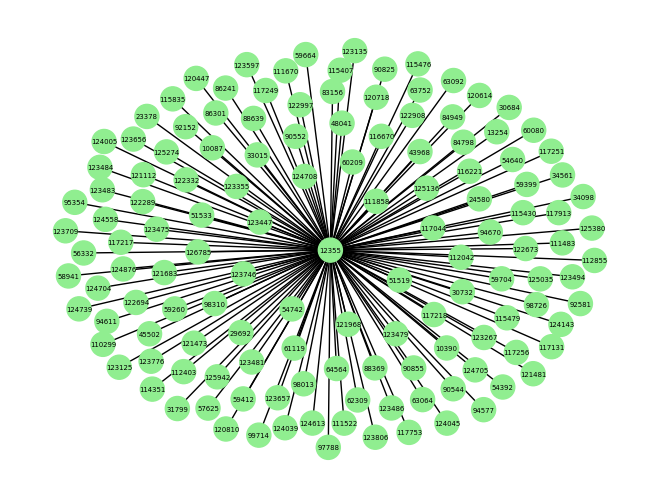

In [60]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

# Create a new graph
G_7 = nx.Graph()

# Use a queue to implement BFS
queue = deque([7])

while queue:
    node = queue.popleft()
    G_7.add_node(node)
    neighbors = list(G.neighbors(node))
    G_7.add_nodes_from(neighbors)
    
    for neighbor in neighbors:
        if G.has_edge(node, neighbor):
            G_7.add_edge(node, neighbor)
            
        if neighbor not in G_7:
            queue.append(neighbor)

# Create a dictionary of labels
labels = {node: G.nodes[node].get('attr_dict').get('Person ID') for node in G_7.nodes}

# Get the colors of the nodes
node_colors = [color_map.get(G.nodes[node].get('attr_dict').get('BU', 'D&I'), 'pink') for node in G_7.nodes]

# Draw the new graph with labels
nx.draw(G_7, labels=labels, with_labels=True,node_color=node_colors, font_size=5)
plt.show()

In [61]:
# Create an empty graph
Gr = nx.DiGraph()

# Create an empty graph 
Gr.clear()
# Iterate over the rows of the DataFrame
for index, row in merged_2024.iterrows():
    # Add the row as a node to the graph
    Gr.add_node(index, attr_dict=row.to_dict())

# Print the number of nodes in the graph
print(f"Number of nodes: {Gr.number_of_nodes()}")

Number of nodes: 5955


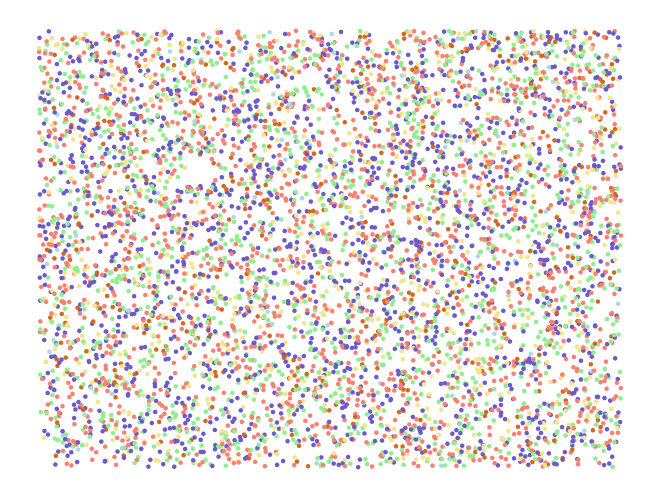

In [62]:
# Define a color map
color_map = {
    'Major Projects': 'salmon',
    'Infrastructure': 'slateblue',
    'Rail': 'lightgreen',
    'Building': 'khaki',
    'Corporate': 'chocolate',
    'TEK': 'lightblue',
    'D&I': 'lightpink'
}

# Get the colors of the nodes
node_colors = [color_map.get(Gr.nodes[node].get('attr_dict').get('BU', 'D&I'), 'pink') for node in Gr.nodes]

# Get the spring layout positions
pos = nx.random_layout(Gr)

# Draw the subgraph
nx.draw(Gr, pos, with_labels=False, node_color=node_colors, node_size=5)

# Show the plot
plt.show()

In [63]:
# Add edges from 'Supervisor ID' to 'Person ID' with 'is_manager' attribute
for node in Gr.nodes:
    supervisor_id = Gr.nodes[node].get('attr_dict').get('Supervisor ID')
    
    # Check if 'Supervisor ID' equals to another node's 'Person ID'
    for other_node in Gr.nodes:
        person_id = Gr.nodes[other_node].get('attr_dict').get('Person ID')
        
        if supervisor_id == person_id:
            Gr.add_edge(other_node, node, is_manager=True)

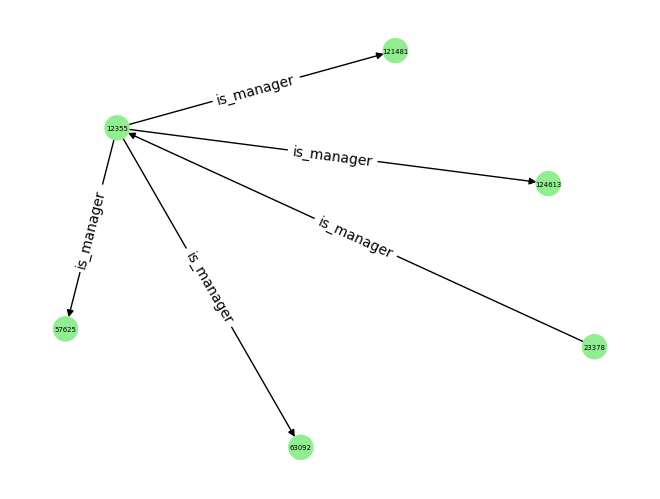

In [64]:
# Define the specific nodes
specific_nodes = [7, 409, 66, 112, 314, 358]

# Create a new directed graph
Gr_7 = nx.DiGraph()

# Add the specific nodes and their edges to Gr_7
for node in specific_nodes:
    Gr_7.add_node(node)
    for neighbor in specific_nodes:
        if Gr.has_edge(node, neighbor):
            Gr_7.add_edge(node, neighbor, is_manager="is_manager")

# Create a dictionary of labels
labels = {node: Gr.nodes[node].get('attr_dict').get('Person ID') for node in Gr_7.nodes}

# Get the colors of the nodes
node_colors = [color_map.get(Gr.nodes[node].get('attr_dict').get('BU', 'D&I'), 'pink') for node in Gr_7.nodes]

# Generate a spring layout
pos = nx.spring_layout(Gr_7, k=50)

# Draw the new graph with labels and arrows
nx.draw(Gr_7, pos, labels=labels, node_color=node_colors, with_labels=True, font_size=5, arrows=True)

# Create a dictionary of edge labels
edge_labels = nx.get_edge_attributes(Gr_7, 'is_manager')

# Draw edge labels
nx.draw_networkx_edge_labels(Gr_7, pos, edge_labels=edge_labels)

plt.show()

In [65]:
# Find the node with 'Person ID' = 88947
node_125290 = None
for node in G.nodes:
    if G.nodes[node].get('attr_dict').get('Person ID') == '125290':
        node_125290 = node
        break

# If the node is found, get its edges
if node_125290 is not None:
    edges_125290 = G.edges(node_125290, data=True)

    # Print the edges
    for edge in edges_125290:
        print(edge)
else:
    print("Node with 'Person ID' = 125290 does not exist in the graph.")

(600, 12, {'name': 'North Western Program Alliance - R'})
(600, 14, {'name': 'North Western Program Alliance - R'})
(600, 16, {'name': 'North Western Program Alliance - R'})
(600, 28, {'name': 'North Western Program Alliance - R'})
(600, 29, {'name': 'North Western Program Alliance - R'})
(600, 30, {'name': 'North Western Program Alliance - R'})
(600, 36, {'name': 'North Western Program Alliance - R'})
(600, 49, {'name': 'North Western Program Alliance - R'})
(600, 67, {'name': 'North Western Program Alliance - R'})
(600, 78, {'name': 'North Western Program Alliance - R'})
(600, 83, {'name': 'North Western Program Alliance - R'})
(600, 103, {'name': 'North Western Program Alliance - R'})
(600, 104, {'name': 'North Western Program Alliance - R'})
(600, 108, {'name': 'North Western Program Alliance - R'})
(600, 110, {'name': 'North Western Program Alliance - R'})
(600, 119, {'name': 'North Western Program Alliance - R'})
(600, 128, {'name': 'North Western Program Alliance - R'})
(600, 13

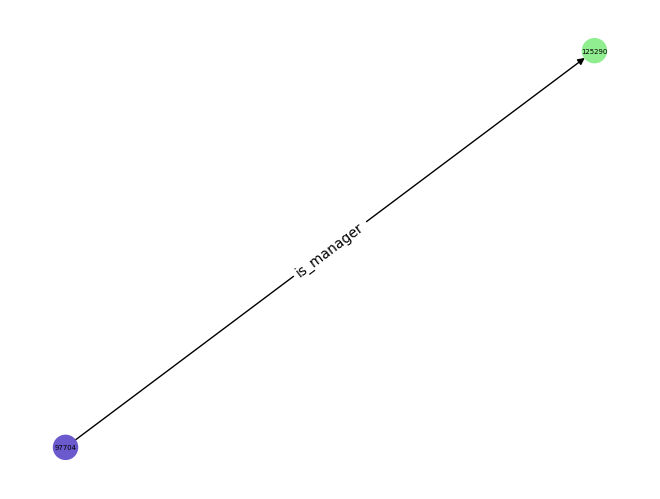

In [66]:
# Define the specific nodes
specific_nodes = [600, 2388]

# Create a new directed graph
Gr_7 = nx.DiGraph()

# Add the specific nodes and their edges to Gr_7
for node in specific_nodes:
    Gr_7.add_node(node)
    for neighbor in specific_nodes:
        if Gr.has_edge(node, neighbor):
            Gr_7.add_edge(node, neighbor, is_manager="is_manager")

# Create a dictionary of labels
labels = {node: Gr.nodes[node].get('attr_dict').get('Person ID') for node in Gr_7.nodes}

# Get the colors of the nodes
node_colors = [color_map.get(Gr.nodes[node].get('attr_dict').get('BU', 'D&I'), 'pink') for node in Gr_7.nodes]

# Generate a spring layout
pos = nx.spring_layout(Gr_7, k=50)

# Draw the new graph with labels and arrows
nx.draw(Gr_7, pos, labels=labels, node_color=node_colors, with_labels=True, font_size=5, arrows=True)

# Create a dictionary of edge labels
edge_labels = nx.get_edge_attributes(Gr_7, 'is_manager')

# Draw edge labels
nx.draw_networkx_edge_labels(Gr_7, pos, edge_labels=edge_labels)

plt.show()